## Observations and Insights 

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/morganclark/GATech_Work/matplotlib-challenge/Mouse_metadata.csv"
study_results_path = "/Users/morganclark/GATech_Work/matplotlib-challenge/Study_results (1).csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
# Checking the number of mice.

mice= merge_df["Mouse ID"].value_counts()
mice_total= len(mice)
mice_total

249

In [55]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_miceID = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_miceID

array(['g989'], dtype=object)

In [56]:
# Optional: Get all the data for the duplicate mouse ID. 



In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'].isin(duplicate_miceID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [58]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice=clean_df["Mouse ID"].value_counts()
cleaned_mice_total=len(cleaned_mice)
cleaned_mice_total

248

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


#mean

mean_summary = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

# median

med_summary = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']


# variance

var_summary = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

# standard deviation 

std_summary = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



summary_stats_df = pd.DataFrame ({
    
    "Mean": mean_summary,
    "Median": med_summary,
    "Variance": var_summary,
    "Standard Dev.": std_summary,
    
        
})

summary_stats_df


,Mean,Median,Variance,Standard Dev.
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



# Using the aggregation method, produce the same summary statistics in a single line



aggregated_df = clean_df.agg(['mean','median', 'std', 'var', 'sem'])['Tumor Volume (mm3)']
aggregated_df


mean      50.435293
median    48.933454
std        8.914197
var       79.462907
sem        0.205591
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

Text(0.5, 1.0, 'Mice Timepoints by Drug Regimen')

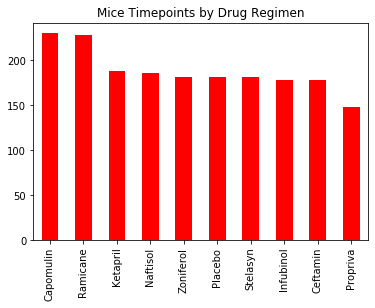

In [61]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



# Group by drug regiment
drugregimen_group = clean_df['Drug Regimen'].value_counts()


timepoints_barchart = drugregimen_group.plot.bar(color= 'red')

plt.xlabel = ('Drug Regimen')
plt.ylabel = ('Timepoint')
plt.title("Mice Timepoints by Drug Regimen")





Text(0.5, 1.0, 'Mice Timepoints by Drug Regimen')

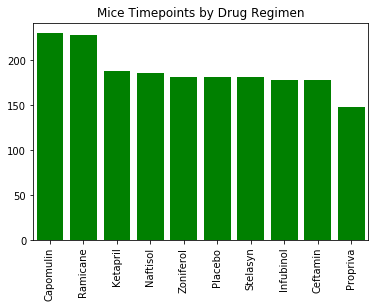

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


x_axis = drugregimen_group.index.values
y_axis = drugregimen_group.values

plt.bar(x_axis, y_axis, color='g', align='center')



timepoints_barchart = drugregimen_group.plot.bar(color= 'green')

plt.xlabel = ('Drug Regimen')
plt.ylabel = ('Timepoint')
plt.title("Mice Timepoints by Drug Regimen")

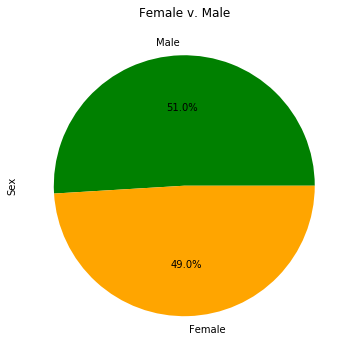

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

colors = ['green', 'orange']

female_male_chart = clean_df['Sex'].value_counts()
female_male_chart.plot.pie(autopct= "%1.1f%%", figsize =(11,6), colors = colors)
plt.title('Female v. Male')



plt.show()








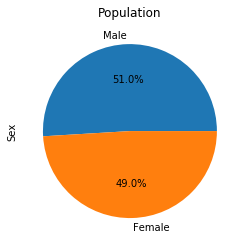

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot




labels = ['Female','Male']
sizes = [60, 50]
female_male_chart.plot.pie(autopct="%1.1f%%")
plt.title('Population')
plt.show()


## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


Capomulin_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint




Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Cap_merge = pd.merge(Capomulin_vol, merge_df, on=("Mouse ID","Timepoint"),how="left")



Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']


Ramicane_vol = pd.DataFrame(Ramicane_last)
Infubinol_vol = pd.DataFrame(Infubinol_last)
Ceftamin_vol = pd.DataFrame(Ceftamin_last)



Ramicane_merge = pd.merge(Ramicane_vol, merge_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge = pd.merge(Infubinol_vol, merge_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge = pd.merge(Ceftamin_vol, merge_df, on=("Mouse ID","Timepoint"),how="left")
    





In [66]:
# Set Quartiles


Cap_tumors = Cap_merge["Tumor Volume (mm3)"]
quartiles =Cap_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    
Rami_tumors = Ramicane_merge["Tumor Volume (mm3)"]
quartiles =Rami_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

Infu_tumors = Infubinol_merge["Tumor Volume (mm3)"]
quartiles =Infu_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

Ceft_tumors = Ceftamin_merge["Tumor Volume (mm3)"]
quartiles = Ceft_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



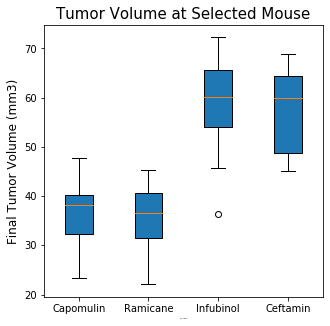

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Cap_tumors, Rami_tumors, Infu_tumors, Ceft_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =15)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 1)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)



plt.show()

## Line and Scatter Plots

In [71]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "k403",:]


xaxis = lineplot_df["Timepoint"]
yaxis = lineplot_df[["Tumor Volume (mm3)"]
plt.plot(xaxis, yaxis)
plt.title('Tumor v. Time')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()        
              

                        
          
                        
                        


SyntaxError: invalid syntax (<ipython-input-71-63e5907f4769>, line 7)

In [69]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

NameError: name 'avg_capm_vol' is not defined